In [1]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

C:\Users\GobatoH\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('S&P 500 Realized Volatility.xlsx',index_col='Date',parse_dates=True)


In [3]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
dilations = [[1,2,1],[1,2,2,1],[1,2,4,1],[1,2,2,2,1],[1,2,4,2,1],[1,2,4,4,1]]
epochs = [12,12,12,13,14,15]
RMSE = []
Accuracy = []
scaler = MinMaxScaler()

21 lags

In [70]:
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[0]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[0], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[0])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(test))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
884/884 [==============================] - 6s 5ms/step - loss: 0.2415 - accuracy: 0.0011 - mean_absolute_error: 0.2413
Epoch 2/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0266 - accuracy: 0.0011 - mean_absolute_error: 0.0918
Epoch 3/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0087 - accuracy: 0.0023 - mean_absolute_error: 0.0548
Epoch 4/12
884/884 [==============================] - 5s 5ms/step - loss: 0.0085 - accuracy: 0.0011 - mean_absolute_error: 0.0501
Epoch 5/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0053 - accuracy: 0.0011 - mean_absolute_error: 0.0434
Epoch 6/12
884/884 [==============================] - 4s 5ms/step - loss: 0.0063 - accuracy: 0.0011 - mean_absolute_error: 0.0447
Epoch 7/12
884/884 [==============================] - 5s 6ms/step - loss: 0.0074 - accuracy: 0.0023 - mean_absolute_error: 0.0465
Epoch 8/12
884/884 [==============================] - 6s 7ms/step - loss: 0.0045 - accurac

1/1 [==============================] - 0s 21ms/step
Epoch 1/12
884/884 [==============================] - 8s 4ms/step - loss: 0.2490 - accuracy: 0.0023 - mean_absolute_error: 0.2604
Epoch 2/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0488 - accuracy: 0.0023 - mean_absolute_error: 0.1131
Epoch 3/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0135 - accuracy: 0.0011 - mean_absolute_error: 0.0632
Epoch 4/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0061 - accuracy: 0.0023 - mean_absolute_error: 0.0481
Epoch 5/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0056 - accuracy: 0.0011 - mean_absolute_error: 0.0435
Epoch 6/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0053 - accuracy: 0.0011 - mean_absolute_error: 0.0444
Epoch 7/12
884/884 [==============================] - 4s 4ms/step - loss: 0.0052 - accuracy: 0.0011 - mean_absolute_error: 0.0432
Epoch 8/12
884/884 [==================

1/1 [==============================] - 0s 26ms/step


In [71]:
Accuracy

[2.697862194540046,
 30.516231415773866,
 32.99355360905237,
 32.309951346335396,
 41.61008762961871]

In [72]:
RMSE

[0.0013230509095096786,
 0.0009579537643491584,
 0.0009390886893202051,
 0.0009538567463594661,
 0.0008635844100871562]

63 lags

In [73]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[1]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[1], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[1])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(test))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
842/842 [==============================] - 9s 7ms/step - loss: 0.8887 - accuracy: 0.0012 - mean_absolute_error: 0.4856
Epoch 2/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0951 - accuracy: 0.0024 - mean_absolute_error: 0.1924
Epoch 3/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0577 - accuracy: 0.0012 - mean_absolute_error: 0.1352
Epoch 4/12
842/842 [==============================] - 7s 9ms/step - loss: 0.0218 - accuracy: 0.0024 - mean_absolute_error: 0.0847
Epoch 5/12
842/842 [==============================] - 14s 17ms/step - loss: 0.0114 - accuracy: 0.0012 - mean_absolute_error: 0.0667
Epoch 6/12
842/842 [==============================] - 13s 16ms/step - loss: 0.0109 - accuracy: 0.0024 - mean_absolute_error: 0.0629
Epoch 7/12
842/842 [==============================] - 11s 13ms/step - loss: 0.0092 - accuracy: 0.0024 - mean_absolute_error: 0.0564
Epoch 8/12
842/842 [==============================] - 13s 15ms/step - loss: 0.0066 -

1/1 [==============================] - 0s 49ms/step
Epoch 1/12
842/842 [==============================] - 22s 14ms/step - loss: 0.3964 - accuracy: 0.0012 - mean_absolute_error: 0.3392
Epoch 2/12
842/842 [==============================] - 9s 10ms/step - loss: 0.0436 - accuracy: 0.0012 - mean_absolute_error: 0.1284
Epoch 3/12
842/842 [==============================] - 8s 9ms/step - loss: 0.0176 - accuracy: 0.0024 - mean_absolute_error: 0.0794
Epoch 4/12
842/842 [==============================] - 6s 7ms/step - loss: 0.0138 - accuracy: 0.0012 - mean_absolute_error: 0.0675
Epoch 5/12
842/842 [==============================] - 6s 8ms/step - loss: 0.0075 - accuracy: 0.0012 - mean_absolute_error: 0.0533
Epoch 6/12
842/842 [==============================] - 7s 8ms/step - loss: 0.0064 - accuracy: 0.0012 - mean_absolute_error: 0.0492
Epoch 7/12
842/842 [==============================] - 5s 6ms/step - loss: 0.0065 - accuracy: 0.0024 - mean_absolute_error: 0.0497
Epoch 8/12
842/842 [===============

1/1 [==============================] - 0s 29ms/step


In [74]:
Accuracy

[46.272968629215995,
 -1.9555533061348829,
 30.71842808088793,
 19.099633220736468,
 23.422002749895686]

In [75]:
RMSE

[0.0008446388885870826,
 0.0013744037155172984,
 0.0009739343777151548,
 0.001107246022335403,
 0.001049413095786641]

84 lags

In [76]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[2]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[2], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[2])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(test))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/12
821/821 [==============================] - 12s 9ms/step - loss: 0.8829 - accuracy: 0.0012 - mean_absolute_error: 0.4690
Epoch 2/12
821/821 [==============================] - 7s 8ms/step - loss: 0.0599 - accuracy: 0.0012 - mean_absolute_error: 0.1520
Epoch 3/12
821/821 [==============================] - 7s 8ms/step - loss: 0.0304 - accuracy: 0.0024 - mean_absolute_error: 0.1031
Epoch 4/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0221 - accuracy: 0.0012 - mean_absolute_error: 0.0806
Epoch 5/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0122 - accuracy: 0.0012 - mean_absolute_error: 0.0649
Epoch 6/12
821/821 [==============================] - 7s 8ms/step - loss: 0.0094 - accuracy: 0.0024 - mean_absolute_error: 0.0565
Epoch 7/12
821/821 [==============================] - 6s 8ms/step - loss: 0.0076 - accuracy: 0.0012 - mean_absolute_error: 0.0510
Epoch 8/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0053 - accura

1/1 [==============================] - 0s 28ms/step
Epoch 1/12
821/821 [==============================] - 14s 13ms/step - loss: 0.4676 - accuracy: 0.0012 - mean_absolute_error: 0.3981
Epoch 2/12
821/821 [==============================] - 10s 12ms/step - loss: 0.0466 - accuracy: 0.0024 - mean_absolute_error: 0.1331
Epoch 3/12
821/821 [==============================] - 9s 11ms/step - loss: 0.0207 - accuracy: 0.0012 - mean_absolute_error: 0.0847
Epoch 4/12
821/821 [==============================] - 7s 9ms/step - loss: 0.0127 - accuracy: 0.0024 - mean_absolute_error: 0.0674
Epoch 5/12
821/821 [==============================] - 12s 15ms/step - loss: 0.0070 - accuracy: 0.0024 - mean_absolute_error: 0.0531
Epoch 6/12
821/821 [==============================] - 9s 10ms/step - loss: 0.0075 - accuracy: 0.0012 - mean_absolute_error: 0.0535
Epoch 7/12
821/821 [==============================] - 9s 11ms/step - loss: 0.0051 - accuracy: 0.0024 - mean_absolute_error: 0.0469
Epoch 8/12
821/821 [=========

1/1 [==============================] - 0s 38ms/step


In [77]:
Accuracy

[46.79892535985333,
 15.384626374369459,
 48.936744166560544,
 34.68157594139636,
 38.66062845829881]

In [78]:
RMSE

[0.0008184183870524637,
 0.001171463933993689,
 0.0008475806004524426,
 0.00092940994189988,
 0.0009029818104042624]

126 lags

In [79]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[3]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[3], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[3])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(test))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/13
779/779 [==============================] - 27s 21ms/step - loss: 1.7646 - accuracy: 0.0026 - mean_absolute_error: 0.6024
Epoch 2/13
779/779 [==============================] - 14s 18ms/step - loss: 0.0833 - accuracy: 0.0013 - mean_absolute_error: 0.1688
Epoch 3/13
779/779 [==============================] - 12s 15ms/step - loss: 0.0583 - accuracy: 0.0013 - mean_absolute_error: 0.1352
Epoch 4/13
779/779 [==============================] - 12s 15ms/step - loss: 0.0319 - accuracy: 0.0026 - mean_absolute_error: 0.0992
Epoch 5/13
779/779 [==============================] - 13s 16ms/step - loss: 0.0227 - accuracy: 0.0026 - mean_absolute_error: 0.0800
Epoch 6/13
779/779 [==============================] - 13s 16ms/step - loss: 0.0212 - accuracy: 0.0026 - mean_absolute_error: 0.0773
Epoch 7/13
779/779 [==============================] - 12s 16ms/step - loss: 0.0118 - accuracy: 0.0013 - mean_absolute_error: 0.0555
Epoch 8/13
779/779 [==============================] - 13s 16ms/step - loss: 

1/1 [==============================] - 0s 31ms/step
Epoch 1/13
779/779 [==============================] - 19s 17ms/step - loss: 2.1864 - accuracy: 0.0000e+00 - mean_absolute_error: 0.7055
Epoch 2/13
779/779 [==============================] - 14s 18ms/step - loss: 0.2189 - accuracy: 0.0013 - mean_absolute_error: 0.2556
Epoch 3/13
779/779 [==============================] - 12s 16ms/step - loss: 0.0458 - accuracy: 0.0013 - mean_absolute_error: 0.1361
Epoch 4/13
779/779 [==============================] - 12s 16ms/step - loss: 0.0423 - accuracy: 0.0026 - mean_absolute_error: 0.1099
Epoch 5/13
779/779 [==============================] - 12s 16ms/step - loss: 0.0179 - accuracy: 0.0013 - mean_absolute_error: 0.0801
Epoch 6/13
779/779 [==============================] - 12s 15ms/step - loss: 0.0142 - accuracy: 0.0013 - mean_absolute_error: 0.0677
Epoch 7/13
779/779 [==============================] - 14s 18ms/step - loss: 0.0249 - accuracy: 0.0013 - mean_absolute_error: 0.0823
Epoch 8/13
779/779 [

1/1 [==============================] - 0s 35ms/step


In [80]:
Accuracy

[56.67952545424173,
 13.108161729880097,
 32.602230662165496,
 -14.334972980840298,
 42.15345540461482]

In [81]:
RMSE

[0.0007710393916877742,
 0.0011717585153009642,
 0.0009653899097884263,
 0.001559482464733706,
 0.0008490595869611416]

189 lags

In [82]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[4]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[4], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[4])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(test))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/14
716/716 [==============================] - 17s 18ms/step - loss: 2.3082 - accuracy: 0.0014 - mean_absolute_error: 0.6623
Epoch 2/14
716/716 [==============================] - 13s 19ms/step - loss: 0.1557 - accuracy: 0.0014 - mean_absolute_error: 0.2576
Epoch 3/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0875 - accuracy: 0.0028 - mean_absolute_error: 0.1768
Epoch 4/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0318 - accuracy: 0.0014 - mean_absolute_error: 0.1167
Epoch 5/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0249 - accuracy: 0.0028 - mean_absolute_error: 0.0992
Epoch 6/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0192 - accuracy: 0.0014 - mean_absolute_error: 0.0805
Epoch 7/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0141 - accuracy: 0.0014 - mean_absolute_error: 0.0709
Epoch 8/14
716/716 [==============================] - 14s 19ms/step - loss: 

1/1 [==============================] - 0s 27ms/step
Epoch 1/14
716/716 [==============================] - 23s 23ms/step - loss: 2.4952 - accuracy: 0.0014 - mean_absolute_error: 0.8154
Epoch 2/14
716/716 [==============================] - 18s 25ms/step - loss: 0.1527 - accuracy: 0.0014 - mean_absolute_error: 0.2357
Epoch 3/14
716/716 [==============================] - 17s 23ms/step - loss: 0.0675 - accuracy: 0.0028 - mean_absolute_error: 0.1573
Epoch 4/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0447 - accuracy: 0.0028 - mean_absolute_error: 0.1242
Epoch 5/14
716/716 [==============================] - 12s 17ms/step - loss: 0.0410 - accuracy: 0.0028 - mean_absolute_error: 0.1129
Epoch 6/14
716/716 [==============================] - 12s 17ms/step - loss: 0.0229 - accuracy: 0.0014 - mean_absolute_error: 0.0864
Epoch 7/14
716/716 [==============================] - 12s 17ms/step - loss: 0.0196 - accuracy: 0.0014 - mean_absolute_error: 0.0770
Epoch 8/14
716/716 [====

1/1 [==============================] - 0s 37ms/step
Epoch 1/14
716/716 [==============================] - 21s 20ms/step - loss: 2.2169 - accuracy: 0.0014 - mean_absolute_error: 0.6501
Epoch 2/14
716/716 [==============================] - 16s 22ms/step - loss: 0.1164 - accuracy: 0.0014 - mean_absolute_error: 0.2036
Epoch 3/14
716/716 [==============================] - 14s 19ms/step - loss: 0.0816 - accuracy: 0.0014 - mean_absolute_error: 0.1680
Epoch 4/14
716/716 [==============================] - 13s 17ms/step - loss: 0.0324 - accuracy: 0.0028 - mean_absolute_error: 0.1159
Epoch 5/14
716/716 [==============================] - 12s 17ms/step - loss: 0.0243 - accuracy: 0.0028 - mean_absolute_error: 0.0976
Epoch 6/14
716/716 [==============================] - 13s 19ms/step - loss: 0.0190 - accuracy: 0.0014 - mean_absolute_error: 0.0822
Epoch 7/14
716/716 [==============================] - 13s 18ms/step - loss: 0.0168 - accuracy: 0.0014 - mean_absolute_error: 0.0784
Epoch 8/14
716/716 [====

1/1 [==============================] - 0s 36ms/step


In [83]:
Accuracy

[41.05550212931032,
 40.09002690300068,
 47.61938696129556,
 44.36471085076962,
 36.27157029893987]

In [84]:
RMSE

[0.0008890242868514179,
 0.000867771306495049,
 0.0008428343266426387,
 0.0008471828811479297,
 0.0009245838260566942]

252 lags

In [85]:
RMSE = []
Accuracy = []
for m in range (5):
        train = df.iloc[:905]
        validation = df.iloc[905:1005]
        test = df.iloc[1005:]
        scaler.fit(train)
        scaled_train_input = scaler.transform(train)
        scaled_validation_input = scaler.transform(validation)
        scaled_test_input = scaler.transform(test)
        train = df["Realised"].iloc[:905]
        validation = df["Realised"].iloc[905:1005]
        test = df["Realised"].iloc[1005:]
        train = train.array.reshape(-1, 1)
        validation = validation.array.reshape(-1, 1)
        test = test.array.reshape(-1, 1)
        scaler.fit(train)
        scaled_train_target = scaler.transform(train)
        scaled_validation_target = scaler.transform(validation)
        scaled_test_target = scaler.transform(test)
        n_features = 4
        n_input = n_inputs[5]
        generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
        model = Sequential()
        model.add(TCN(kernel_size=3, dilations=dilations[5], nb_stacks=1,padding='causal',
                      dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
        model.fit(generator,epochs=epochs[5])
        last_train_batch = scaled_train_input[-n_input:]
        last_train_batch = last_train_batch.reshape((1, n_input, n_features))
        a = np.array(scaled_validation_input)
        test_predictions = []
        first_eval_batch = scaled_train_input[-n_input:]
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
        for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
            current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
            test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
            current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
        true_predictions = scaler.inverse_transform(test_predictions)
        RMSE.append(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
        Accuracy.append((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)

Epoch 1/15
653/653 [==============================] - 19s 20ms/step - loss: 1.4634 - accuracy: 0.0015 - mean_absolute_error: 0.6538
Epoch 2/15
653/653 [==============================] - 11s 17ms/step - loss: 0.0979 - accuracy: 0.0015 - mean_absolute_error: 0.1952
Epoch 3/15
653/653 [==============================] - 11s 17ms/step - loss: 0.0579 - accuracy: 0.0031 - mean_absolute_error: 0.1451
Epoch 4/15
653/653 [==============================] - 10s 16ms/step - loss: 0.0208 - accuracy: 0.0015 - mean_absolute_error: 0.0937
Epoch 5/15
653/653 [==============================] - 15s 24ms/step - loss: 0.0258 - accuracy: 0.0015 - mean_absolute_error: 0.0937
Epoch 6/15
653/653 [==============================] - 14s 22ms/step - loss: 0.0139 - accuracy: 0.0031 - mean_absolute_error: 0.0772
Epoch 7/15
653/653 [==============================] - 16s 24ms/step - loss: 0.0194 - accuracy: 0.0015 - mean_absolute_error: 0.0800
Epoch 8/15
653/653 [==============================] - 16s 24ms/step - loss: 

1/1 [==============================] - 0s 26ms/step
Epoch 1/15
653/653 [==============================] - 16s 18ms/step - loss: 1.8901 - accuracy: 0.0031 - mean_absolute_error: 0.7208
Epoch 2/15
653/653 [==============================] - 13s 20ms/step - loss: 0.1298 - accuracy: 0.0031 - mean_absolute_error: 0.2246
Epoch 3/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0902 - accuracy: 0.0031 - mean_absolute_error: 0.1661
Epoch 4/15
653/653 [==============================] - 13s 20ms/step - loss: 0.0220 - accuracy: 0.0015 - mean_absolute_error: 0.0947
Epoch 5/15
653/653 [==============================] - 14s 21ms/step - loss: 0.0193 - accuracy: 0.0031 - mean_absolute_error: 0.0845
Epoch 6/15
653/653 [==============================] - 14s 21ms/step - loss: 0.0186 - accuracy: 0.0031 - mean_absolute_error: 0.0812
Epoch 7/15
653/653 [==============================] - 13s 21ms/step - loss: 0.0099 - accuracy: 0.0031 - mean_absolute_error: 0.0609
Epoch 8/15
653/653 [====

1/1 [==============================] - 0s 30ms/step
Epoch 1/15
653/653 [==============================] - 17s 18ms/step - loss: 1.3616 - accuracy: 0.0015 - mean_absolute_error: 0.6228
Epoch 2/15
653/653 [==============================] - 12s 18ms/step - loss: 0.1201 - accuracy: 0.0015 - mean_absolute_error: 0.2093
Epoch 3/15
653/653 [==============================] - 12s 18ms/step - loss: 0.0461 - accuracy: 0.0031 - mean_absolute_error: 0.1304
Epoch 4/15
653/653 [==============================] - 11s 18ms/step - loss: 0.0199 - accuracy: 0.0031 - mean_absolute_error: 0.0959
Epoch 5/15
653/653 [==============================] - 13s 19ms/step - loss: 0.0198 - accuracy: 0.0015 - mean_absolute_error: 0.0861
Epoch 6/15
653/653 [==============================] - 22s 33ms/step - loss: 0.0118 - accuracy: 0.0031 - mean_absolute_error: 0.0666
Epoch 7/15
653/653 [==============================] - 23s 34ms/step - loss: 0.0087 - accuracy: 0.0031 - mean_absolute_error: 0.0614
Epoch 8/15
653/653 [====

In [86]:
Accuracy

[14.517187792552278,
 34.630348073472575,
 14.350969357593268,
 39.57445823640129,
 38.94520925164794]

In [87]:
RMSE

[0.0011568737533172659,
 0.0009378120436531033,
 0.0011561166372113284,
 0.000898416505336889,
 0.0008814257164611848]

In [33]:
train = df.iloc[:1005]
test = df.iloc[1005:]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:1005]
test = df["Realised"].iloc[1005:]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 4
n_input = n_inputs[4]
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=1)
model = Sequential()
model.add(TCN(kernel_size=3, dilations=dilations[4], nb_stacks=1,padding='causal',
              dropout_rate=0.35,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=35)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(scaled_test_input)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-(np.sum(np.sqrt((test-true_predictions)**2)/test)/len(test)))*100)

Epoch 1/35
816/816 [==============================] - 17s 15ms/step - loss: 4.2361 - accuracy: 0.0012 - mean_absolute_error: 1.0433
Epoch 2/35
816/816 [==============================] - 13s 16ms/step - loss: 0.2505 - accuracy: 0.0025 - mean_absolute_error: 0.3199
Epoch 3/35
816/816 [==============================] - 12s 15ms/step - loss: 0.1105 - accuracy: 0.0025 - mean_absolute_error: 0.1989
Epoch 4/35
816/816 [==============================] - 12s 15ms/step - loss: 0.0614 - accuracy: 0.0012 - mean_absolute_error: 0.1587
Epoch 5/35
816/816 [==============================] - 12s 15ms/step - loss: 0.0338 - accuracy: 0.0025 - mean_absolute_error: 0.1190
Epoch 6/35
816/816 [==============================] - 12s 15ms/step - loss: 0.0292 - accuracy: 0.0025 - mean_absolute_error: 0.1037
Epoch 7/35
816/816 [==============================] - 13s 15ms/step - loss: 0.0242 - accuracy: 0.0012 - mean_absolute_error: 0.0874
Epoch 8/35
816/816 [==============================] - 12s 15ms/step - loss: 

1/1 [==============================] - 0s 33ms/step


In [34]:
Accuracy

[71.68860255931588,
 68.89359201069642,
 68.79250623134595,
 67.61279393634268,
 71.31214384804635,
 70.21962050782685,
 72.11761810381583,
 69.66627642903754,
 70.7255458612837,
 68.21526424425579,
 68.91922607891048,
 71.87839060414605,
 70.9737868100754,
 69.82924124876627,
 70.14028758797319]

In [37]:
print("mean: %s" %(round(np.mean(Accuracy),2))+"%")

mean: 70.07%


In [38]:
print("stdv: %s" %(round(np.std(Accuracy),2))+"%")

stdv: 1.34%


In [39]:
Accuracy_CI_95_lower_bound=np.mean(Accuracy)-2*np.std(Accuracy)
Accuracy_CI_95_upper_bound=np.mean(Accuracy)+2*np.std(Accuracy)
print("95 percent CI lower bound: %s" %round(Accuracy_CI_95_lower_bound,2)+"%")
print("95 percent CI upper bound: %s" %round(Accuracy_CI_95_upper_bound,2)+"%")

95 percent CI lower bound: 67.39%
95 percent CI upper bound: 72.75%


In [40]:
Accuracy_CI_99_lower_bound=np.mean(Accuracy)-3*np.std(Accuracy)
Accuracy_CI_99_upper_bound=np.mean(Accuracy)+3*np.std(Accuracy)
print("99.7 percent CI lower bound: %s" %round(Accuracy_CI_99_lower_bound,2)+"%")
print("99.7 percent CI upper bound: %s" %round(Accuracy_CI_99_upper_bound,2)+"%")

99.7 percent CI lower bound: 66.05%
99.7 percent CI upper bound: 74.09%


In [36]:
RMSE

[0.0031231163452454715,
 0.0033659491430112656,
 0.003726674194460229,
 0.0031237038178104806,
 0.0031828710630892494,
 0.003217313574439475,
 0.0034460156021066403,
 0.0032208689164741912,
 0.0033559436105135097,
 0.003083710624566334,
 0.003478263339997706,
 0.0033540065718720004,
 0.003525962938853862,
 0.0032294415634664324,
 0.003240170964610877]

In [41]:
print("mean: %s" %(round(np.mean(RMSE),5)*100)+"%")

mean: 0.331%


In [42]:
print("stdv: %s" %(round(np.std(RMSE),5)*100)+"%")

stdv: 0.017%


In [43]:
RMSE_CI_95_lower_bound=np.mean(RMSE)-2*np.std(RMSE)
RMSE_CI_95_upper_bound=np.mean(RMSE)+2*np.std(RMSE)
print("95 percent CI lower bound: %s" %(round(RMSE_CI_95_lower_bound,5)*100)+"%")
print("95 percent CI upper bound: %s" %(round(RMSE_CI_95_upper_bound,5)*100)+"%")

95 percent CI lower bound: 0.297%
95 percent CI upper bound: 0.365%


In [44]:
RMSE_CI_99_lower_bound=np.mean(RMSE)-3*np.std(RMSE)
RMSE_CI_99_upper_bound=np.mean(RMSE)+3*np.std(RMSE)
print("99.7 percent CI lower bound: %s" %(round(RMSE_CI_99_lower_bound,5)*100)+"%")
print("99.7 percent CI upper bound: %s" %(round(RMSE_CI_99_upper_bound,5)*100)+"%")

99.7 percent CI lower bound: 0.27999999999999997%
99.7 percent CI upper bound: 0.382%


Text(0, 0.5, 'S&P 500 Realized Volatility')

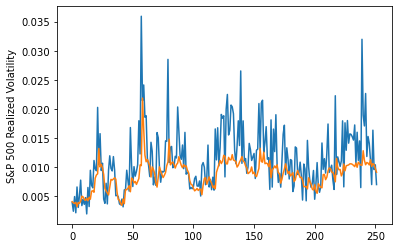

In [40]:
# Best model 72.11761810381583
plt.plot(range(252), test)
plt.plot(range(252), true_predictions) 
plt.ylabel("S&P 500 Realized Volatility")